In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import keras

#for tensorboard
from tensorflow.keras.callbacks import TensorBoard
tensorboard_callback = TensorBoard('.logdir')

# network and training
EPOCHS = 50
BATCH_SIZE = 128
VERBOSE = 1
NB_CLASSES = 10   # number of outputs = number of digits
N_HIDDEN = 128
VALIDATION_SPLIT=0.2 # how much TRAIN is reserved for VALIDATION
DROPOUT = 0.3

# loading MNIST dataset
# verify
# the split between train and test is 60,000, and 10,000 respectly
# one-hot is automatically applied
mnist = keras.datasets.mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

#X_train is 60000 rows of 28x28 values --> reshaped in 60000 x 784
RESHAPED = 784
#
X_train = X_train.reshape(60000, RESHAPED)
X_test = X_test.reshape(10000, RESHAPED)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

#normalize in [0,1]
X_train, X_test = X_train / 255.0, X_test / 255.0
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

#one-hot
Y_train = tf.keras.utils.to_categorical(Y_train, NB_CLASSES)
Y_test = tf.keras.utils.to_categorical(Y_test, NB_CLASSES)

#build the model
model = tf.keras.models.Sequential()
model.add(keras.layers.Dense(N_HIDDEN,
   		input_shape=(RESHAPED,),
   		name='dense_layer', activation='relu'))
model.add(keras.layers.Dropout(DROPOUT))
model.add(keras.layers.Dense(N_HIDDEN,
   		name='dense_layer_2', activation='relu'))
model.add(keras.layers.Dropout(DROPOUT))
model.add(keras.layers.Dense(NB_CLASSES,
   		name='dense_layer_3', activation='softmax'))

# summary of the model
model.summary()

60000 train samples
10000 test samples
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_layer (Dense)         (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_layer_2 (Dense)       (None, 128)               16512     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_layer_3 (Dense)       (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


# **adam OPTIMIZER**

In [2]:
# compiling the model
model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [3]:
#training the moodel
r=model.fit(X_train, Y_train,
		batch_size=BATCH_SIZE, epochs=EPOCHS,
		verbose=VERBOSE, validation_split=VALIDATION_SPLIT,
		callbacks=[tensorboard_callback])

Epoch 1/50
375/375 [==============================] - 9s 12ms/step - loss: 0.5263 - accuracy: 0.8382 - val_loss: 0.1899 - val_accuracy: 0.9435
Epoch 2/50
375/375 [==============================] - 3s 9ms/step - loss: 0.2336 - accuracy: 0.9303 - val_loss: 0.1361 - val_accuracy: 0.9592
Epoch 3/50
375/375 [==============================] - 4s 9ms/step - loss: 0.1802 - accuracy: 0.9457 - val_loss: 0.1152 - val_accuracy: 0.9663
Epoch 4/50
375/375 [==============================] - 3s 8ms/step - loss: 0.1530 - accuracy: 0.9525 - val_loss: 0.1082 - val_accuracy: 0.9682
Epoch 5/50
375/375 [==============================] - 3s 7ms/step - loss: 0.1345 - accuracy: 0.9590 - val_loss: 0.0918 - val_accuracy: 0.9722
Epoch 6/50
375/375 [==============================] - 2s 4ms/step - loss: 0.1186 - accuracy: 0.9637 - val_loss: 0.0889 - val_accuracy: 0.9733
Epoch 7/50
375/375 [==============================] - 2s 4ms/step - loss: 0.1055 - accuracy: 0.9673 - val_loss: 0.0890 - val_accuracy: 0.9729
Epoch

In [4]:
#evalute the model
test_loss, test_acc = model.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

# making prediction
predictions = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0847 - accuracy: 0.9800
Test accuracy: 0.9800000190734863
313/313 [==============================] - 1s 2ms/step


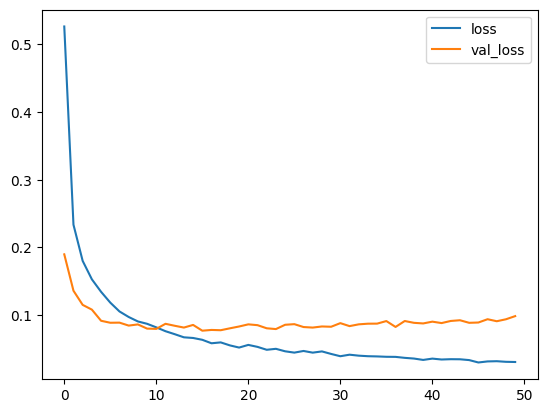

In [5]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend(loc="upper right")
plt.show()

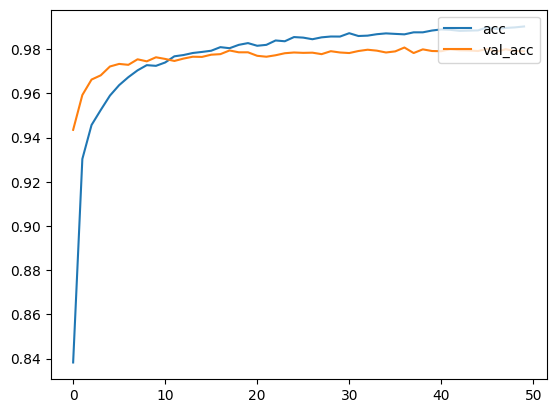

In [6]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend(loc="upper right")
plt.show()